### NB - Continued: 새로운 데이터 넣기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/census_score.xlsx', engine = 'openpyxl')
df.head()

,Married,Female,White,Age,Edu
0,N,Y,Y,5,N
1,N,Y,Y,5,N
2,N,Y,N,5,Y
3,N,Y,Y,5,N
4,N,Y,Y,3,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Married  66 non-null     object
 1   Female   66 non-null     object
 2   White    66 non-null     object
 3   Age      66 non-null     int64 
 4   Edu      66 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.7+ KB


In [ ]:
# 데이터 분할
# 전체 데이터
X = df

print("X 데이터: ", X.shape)

X 데이터:  (66, 5)


In [ ]:
# 더미변수
dummy_vars = ['Married', 'Female', 'White', 'Edu']
X_dm = pd.get_dummies(X[dummy_vars])
X_dm.head()

,Married_N,Married_Y,Female_N,Female_Y,White_N,White_Y,Edu_N,Edu_Y
0,True,False,False,True,False,True,True,False
1,True,False,False,True,False,True,True,False
2,True,False,False,True,True,False,False,True
3,True,False,False,True,False,True,True,False
4,True,False,False,True,False,True,False,True


In [ ]:
X_dm = X_dm.iloc[:,[1,3,5,7]]
X_dm.head()

,Married_Y,Female_Y,White_Y,Edu_Y
0,False,True,True,False
1,False,True,True,False
2,False,True,False,True
3,False,True,True,False
4,False,True,True,True


In [ ]:
X.head()

,Married,Female,White,Age,Edu
0,N,Y,Y,5,N
1,N,Y,Y,5,N
2,N,Y,N,5,Y
3,N,Y,Y,5,N
4,N,Y,Y,3,Y


In [ ]:
X = pd.concat([X_dm, X['Age']], axis = 1)
X.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age
0,False,True,True,False,5
1,False,True,True,False,5
2,False,True,False,True,5
3,False,True,True,False,5
4,False,True,True,True,3


In [ ]:
y_score = nb.predict(X)

In [ ]:
new_data = pd.concat([X, pd.Series(y_score)], axis = 1)
new_data.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age,0
0,False,True,True,False,5,1
1,False,True,True,False,5,1
2,False,True,False,True,5,1
3,False,True,True,False,5,1
4,False,True,True,True,3,1


In [ ]:
new_data = new_data.rename(columns = {0: 'y_score'})

In [ ]:
new_data.head()

,Married_Y,Female_Y,White_Y,Edu_Y,Age,y_score
0,False,True,True,False,5,1
1,False,True,True,False,5,1
2,False,True,False,True,5,1
3,False,True,True,False,5,1
4,False,True,True,True,3,1


In [ ]:
print(pd.crosstab(new_data['Married_Y'], new_data['y_score']))
print(pd.crosstab(new_data['Female_Y'], new_data['y_score']))
print(pd.crosstab(new_data['White_Y'], new_data['y_score']))
print(pd.crosstab(new_data['Edu_Y'], new_data['y_score']))
print(pd.crosstab(new_data['Age'], new_data['y_score']))

y_score    0   1
Married_Y       
False      0  52
True       6   8
y_score   0   1
Female_Y       
False     6  34
True      0  26
y_score  0   1
White_Y       
False    1   5
True     5  55
y_score  0   1
Edu_Y         
False    1  21
True     5  39
y_score  0   1
Age           
1        0   3
2        0   5
3        1  14
4        1  12
5        4  26


In [ ]:
# 카이제곱검정
from scipy.stats import chi2_contingency
print(pd.crosstab(new_data['Married_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Married_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Female_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Female_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['White_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['White_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Edu_Y'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Edu_Y'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Age'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Age'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

y_score      0         1
Married_Y               
False      0.0  0.866667
True       1.0  0.133333
Chi2ContingencyResult(statistic=19.602815934065934, pvalue=9.532859457582942e-06, dof=1, expected_freq=array([[ 4.7273,  1.2727],
       [47.2727, 12.7273]]))
y_score     0         1
Female_Y               
False     1.0  0.566667
True      0.0  0.433333
Chi2ContingencyResult(statistic=2.6669711538461542, pvalue=0.10245082881694288, dof=1, expected_freq=array([[ 3.6364,  2.3636],
       [36.3636, 23.6364]]))
y_score         0         1
White_Y                    
False    0.166667  0.083333
True     0.833333  0.916667
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[ 0.5455,  5.4545],
       [ 5.4545, 54.5455]]))
y_score         0     1
Edu_Y                  
False    0.166667  0.35
True     0.833333  0.65
Chi2ContingencyResult(statistic=0.20625000000000002, pvalue=0.6497226287855103, dof=1, expected_freq=array([[ 2.,  4.],
       [20., 40.]]))
y_score      

In [ ]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr
stats = importr(name = 'stats')

In [ ]:
# 피셔정확검정
# 기대빈도가 5 이하의 셀이 20%를 넘는 경우
tab = np.array(pd.crosstab(new_data.Married_Y, new_data.y_score))
print(stats.fisher_test(tab))
tab = np.array(pd.crosstab(new_data.Female_Y, new_data.y_score))
print(stats.fisher_test(tab))


	Fisher's Exact Test for Count Data

data:  structure(c(0L, 6L, 52L, 8L), dim = c(2L, 2L))
p-value = 3.305e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0000000 0.1674979
sample estimates:
odds ratio 
         0 



	Fisher's Exact Test for Count Data

data:  structure(c(6L, 0L, 34L, 26L), dim = c(2L, 2L))
p-value = 0.07374
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8109786       Inf
sample estimates:
odds ratio 
       Inf 




## NB (OneHotEncoder/ LabelEncoder사용해보기)

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/volunteer_data.xlsx', engine = 'openpyxl')
df.head()
# 성별, 결혼여부, 대학학위여부, 연간소득5만달러이상여부, 자원봉사참여여부

,Sex,Married,College,Income,Volunteer
0,F,Y,1,0,0
1,F,Y,0,1,1
2,M,Y,0,0,0
3,F,Y,0,0,0
4,F,N,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sex        5000 non-null   object
 1   Married    5000 non-null   object
 2   College    5000 non-null   int64 
 3   Income     5000 non-null   int64 
 4   Volunteer  5000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


In [ ]:
df['Volunteer'].unique()

array([0, 1])

In [ ]:
df['Volunteer'].value_counts()

Volunteer
0    2608
1    2392
Name: count, dtype: int64

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop('Volunteer', axis = 1)
y = df['Volunteer']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (5000, 4)
y 데이터:  (5000,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (3500, 4)
test 데이터:  (1500, 4)


### OneHotEncoder

In [ ]:
# 더미변수
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

In [ ]:
# OneHotEncoder
encoding_vars = ['Sex', 'Married']
print(X_train[encoding_vars])
X_train_dm = pd.DataFrame(onehot_encoder.fit_transform(X_train[encoding_vars]).toarray())
print(X_train_dm[:5])
# 데이터프레임 => 작업 가능

     Sex Married
1840   F       N
2115   M       Y
4437   F       Y
1146   F       N
2486   F       Y
...   ..     ...
4426   F       N
466    F       N
3092   F       N
3772   F       N
860    M       N

[3500 rows x 2 columns]
     0    1    2    3
0  1.0  0.0  1.0  0.0
1  0.0  1.0  0.0  1.0
2  1.0  0.0  0.0  1.0
3  1.0  0.0  1.0  0.0
4  1.0  0.0  0.0  1.0


In [ ]:
# # 더미변수
# encoding_vars = ['Sex', 'Married']
# print(X_train[encoding_vars])
# dm_test = pd.get_dummies(X_train[encoding_vars])
# print(dm_test[:5])
# # 데이터프레임

In [ ]:
X_train_dm

,0,1,2,3
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
3495,1.0,0.0,1.0,0.0
3496,1.0,0.0,1.0,0.0
3497,1.0,0.0,1.0,0.0
3498,1.0,0.0,1.0,0.0


In [ ]:
X_train_dm = X_train_dm.iloc[:,[1,3]]
X_train_dm.head()

,1,3
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


In [ ]:
# 남성여부, 결혼여부
X_train_dm.columns = X_train[encoding_vars].columns
X_train_dm.head()

,Sex,Married
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


In [ ]:
X_train

,Sex,Married,College,Income
1840,F,N,0,0
2115,M,Y,1,1
4437,F,Y,1,1
1146,F,N,0,0
2486,F,Y,1,0
...,...,...,...,...
4426,F,N,1,0
466,F,N,1,1
3092,F,N,1,0
3772,F,N,0,0


In [ ]:
X_train.drop(encoding_vars, axis=1).reset_index(drop = True)

,College,Income
0,0,0
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
3495,1,0
3496,1,1
3497,1,0
3498,0,0


In [ ]:
X_train = pd.concat([X_train_dm, X_train.drop(encoding_vars, axis=1).reset_index(drop = True)], axis=1)
X_train.head()

,Sex,Married,College,Income
0,0.0,0.0,0,0
1,1.0,1.0,1,1
2,0.0,1.0,1,1
3,0.0,0.0,0,0
4,0.0,1.0,1,0


In [ ]:
encoding_vars = ['Sex', 'Married']
X_test_dm = pd.DataFrame(onehot_encoder.transform(X_test[encoding_vars]).toarray())
X_test_dm = X_test_dm.iloc[:,[1,3]]
X_test_dm.columns = X_test[encoding_vars].columns
X_test = pd.concat([X_test_dm, X_test.drop(encoding_vars, axis=1).reset_index(drop = True)], axis=1)
X_test.head()

,Sex,Married,College,Income
0,0.0,1.0,1,0
1,0.0,0.0,0,0
2,0.0,1.0,0,1
3,0.0,1.0,1,1
4,0.0,1.0,0,1


### LabelEncoder

In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
label_encoder.fit_transform(X_train['Sex'])

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
# LabelEncoder
encoding_vars = ['Sex', 'Married']
print(X_train[encoding_vars])
print(X_test[encoding_vars])
for i in encoding_vars:
  X_train[i] = label_encoder.fit_transform(X_train[i])
  X_test[i] = label_encoder.transform(X_test[i])
print(X_train[encoding_vars])
print(X_test[encoding_vars])
# 데이터프레임

     Sex Married
1840   F       N
2115   M       Y
4437   F       Y
1146   F       N
2486   F       Y
...   ..     ...
4426   F       N
466    F       N
3092   F       N
3772   F       N
860    M       N

[3500 rows x 2 columns]
     Sex Married
1501   F       Y
2586   F       N
2653   F       Y
1055   F       Y
705    F       Y
...   ..     ...
3563   F       Y
1538   F       Y
1837   F       Y
2380   F       Y
1912   F       Y

[1500 rows x 2 columns]
      Sex  Married
1840    0        0
2115    1        1
4437    0        1
1146    0        0
2486    0        1
...   ...      ...
4426    0        0
466     0        0
3092    0        0
3772    0        0
860     1        0

[3500 rows x 2 columns]
      Sex  Married
1501    0        1
2586    0        0
2653    0        1
1055    0        1
705     0        1
...   ...      ...
3563    0        1
1538    0        1
1837    0        1
2380    0        1
1912    0        1

[1500 rows x 2 columns]


### 모델 훈련 및 평가 - CategoricalNB

In [ ]:
# 모델 훈련
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# 정확도
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.8097142857142857
0.826


In [ ]:
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 1 0 0]
[0 0 1 0 1]
[0 0 1 1 1]
[0 1 1 1 1]


In [ ]:
y_train_proba = nb.predict_proba(X_train)
y_test_proba = nb.predict_proba(X_test)
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.7374 0.2626]
 [0.5829 0.4171]
 [0.1481 0.8519]
 [0.7374 0.2626]
 [0.6617 0.3383]]
[[0.6617 0.3383]
 [0.7374 0.2626]
 [0.1304 0.8696]
 [0.1481 0.8519]
 [0.1304 0.8696]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[1721   78]
 [ 588 1113]]
[[779  30]
 [231 460]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1799
           1       0.93      0.65      0.77      1701

    accuracy                           0.81      3500
   macro avg       0.84      0.81      0.80      3500
weighted avg       0.84      0.81      0.80      3500

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       809
           1       0.94      0.67      0.78       691

    accuracy                           0.83      1500
   macro avg       0.86      0.81      0.82      1500
weighted avg       0.85      0.83      0.82      1500



In [ ]:
# ROC - 1 기준
y_test_proba1 = nb.predict_proba(X_test)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[0.87 0.85 0.8  0.78 0.45 0.42 0.37 0.34 0.33 0.3  0.26 0.24 0.07 0.06
 0.04 0.04]
fpr: [0.02 0.03 0.03 0.04 0.1  0.15 0.36 0.55 0.56 0.58 0.68 0.77 0.85 0.92
 0.96 1.  ]
tpr: [0.34 0.58 0.62 0.67 0.68 0.7  0.81 0.88 0.88 0.88 0.97 0.99 0.99 1.
 1.   1.  ]


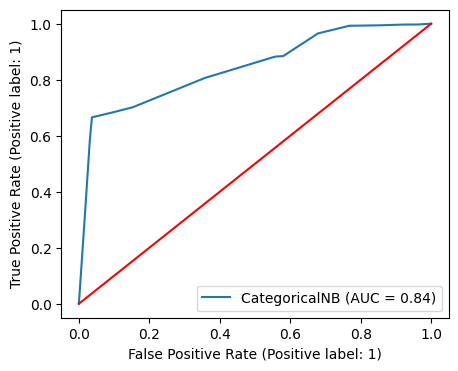

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(nb, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8446546539563057
0.8446546539563057


### 새로운 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/volunteer_data.xlsx', sheet_name = "Volunteer_Score", engine = 'openpyxl')
df.head()

,Sex,Married,College,Income
0,M,N,1,0
1,M,Y,0,0
2,F,N,0,1
3,F,Y,1,0
4,F,N,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sex      9 non-null      object
 1   Married  9 non-null      object
 2   College  9 non-null      int64 
 3   Income   9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


In [ ]:
# 데이터 분할
# 전체 데이터
X = df

print("X 데이터: ", X.shape)

X 데이터:  (9, 4)


### OneHotEncoder

In [ ]:
# OneHotEncoder
encoding_vars = ['Sex', 'Married']
print(X[encoding_vars])
X_dm = pd.DataFrame(onehot_encoder.transform(X[encoding_vars]).toarray())
print(X_dm[:5])
# 데이터프레임 => 작업 가능

  Sex Married
0   M       N
1   M       Y
2   F       N
3   F       Y
4   F       N
5   M       N
6   F       Y
7   M       Y
8   F       N
     0    1    2    3
0  0.0  1.0  1.0  0.0
1  0.0  1.0  0.0  1.0
2  1.0  0.0  1.0  0.0
3  1.0  0.0  0.0  1.0
4  1.0  0.0  1.0  0.0


In [ ]:
X_dm

,0,1,2,3
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0
5,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,1.0
7,0.0,1.0,0.0,1.0
8,1.0,0.0,1.0,0.0


In [ ]:
X_dm = X_dm.iloc[:,[1,3]]
X_dm.head()

,1,3
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [ ]:
# 남성여부, 결혼여부
X_dm.columns = X[encoding_vars].columns
X_dm.head()

,Sex,Married
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [ ]:
X

,Sex,Married,College,Income
0,M,N,1,0
1,M,Y,0,0
2,F,N,0,1
3,F,Y,1,0
4,F,N,0,1
5,M,N,1,0
6,F,Y,0,0
7,M,Y,1,1
8,F,N,1,1


In [ ]:
X.drop(encoding_vars, axis=1).reset_index(drop = True)

,College,Income
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,0
7,1,1
8,1,1


In [ ]:
X = pd.concat([X_dm, X.drop(encoding_vars, axis=1).reset_index(drop = True)], axis=1)
X.head()

,Sex,Married,College,Income
0,1.0,0.0,1,0
1,1.0,1.0,0,0
2,0.0,0.0,0,1
3,0.0,1.0,1,0
4,0.0,0.0,0,1


### 예측

In [ ]:
y_score = nb.predict(X)

In [ ]:
new_data = pd.concat([X, pd.Series(y_score)], axis = 1).rename(columns = {0: 'y_score'})
new_data.head()

,Sex,Married,College,Income,y_score
0,1.0,0.0,1,0,0
1,1.0,1.0,0,0,0
2,0.0,0.0,0,1,1
3,0.0,1.0,1,0,0
4,0.0,0.0,0,1,1


In [ ]:
print(pd.crosstab(new_data['Sex'], new_data['y_score']))
print(pd.crosstab(new_data['Married'], new_data['y_score']))
print(pd.crosstab(new_data['College'], new_data['y_score']))
print(pd.crosstab(new_data['Income'], new_data['y_score']))

y_score  0  1
Sex          
0.0      2  3
1.0      4  0
y_score  0  1
Married      
0.0      2  3
1.0      4  0
y_score  0  1
College      
0        2  2
1        4  1
y_score  0  1
Income       
0        5  0
1        1  3


In [ ]:
# 카이제곱검정
from scipy.stats import chi2_contingency
print(pd.crosstab(new_data['Sex'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Sex'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Married'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Married'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['College'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['College'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

print(pd.crosstab(new_data['Income'], new_data['y_score'], normalize='columns'))
tab = pd.crosstab(new_data['Income'], new_data['y_score'])
print(chi2_contingency((tab[0], tab[1])))

y_score         0    1
Sex                   
0.0      0.333333  1.0
1.0      0.666667  0.0
Chi2ContingencyResult(statistic=1.40625, pvalue=0.23567991342903416, dof=1, expected_freq=array([[3.3333, 2.6667],
       [1.6667, 1.3333]]))
y_score         0    1
Married               
0.0      0.333333  1.0
1.0      0.666667  0.0
Chi2ContingencyResult(statistic=1.40625, pvalue=0.23567991342903416, dof=1, expected_freq=array([[3.3333, 2.6667],
       [1.6667, 1.3333]]))
y_score         0         1
College                    
0        0.333333  0.666667
1        0.666667  0.333333
Chi2ContingencyResult(statistic=0.056249999999999994, pvalue=0.8125242693153686, dof=1, expected_freq=array([[2.6667, 3.3333],
       [1.3333, 1.6667]]))
y_score         0    1
Income                
0        0.833333  0.0
1        0.166667  1.0
Chi2ContingencyResult(statistic=2.7562500000000005, pvalue=0.09687507502627428, dof=1, expected_freq=array([[3.3333, 2.6667],
       [1.6667, 1.3333]]))


In [ ]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr
stats = importr(name = 'stats')

In [ ]:
# 피셔정확검정
# 기대빈도가 5 이하의 셀이 20%를 넘는 경우
tab = np.array(pd.crosstab(new_data.Sex, new_data.y_score))
print(stats.fisher_test(tab))
tab = np.array(pd.crosstab(new_data.Married, new_data.y_score))
print(stats.fisher_test(tab))
tab = np.array(pd.crosstab(new_data.College, new_data.y_score))
print(stats.fisher_test(tab))
tab = np.array(pd.crosstab(new_data.Income, new_data.y_score))
print(stats.fisher_test(tab))


	Fisher's Exact Test for Count Data

data:  structure(c(2L, 4L, 3L, 0L), dim = c(2L, 2L))
p-value = 0.1667
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.00000 2.64606
sample estimates:
odds ratio 
         0 



	Fisher's Exact Test for Count Data

data:  structure(c(2L, 4L, 3L, 0L), dim = c(2L, 2L))
p-value = 0.1667
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.00000 2.64606
sample estimates:
odds ratio 
         0 



	Fisher's Exact Test for Count Data

data:  structure(c(2L, 4L, 2L, 1L), dim = c(2L, 2L))
p-value = 0.5238
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.003413082 9.077862578
sample estimates:
odds ratio 
 0.2951972 



	Fisher's Exact Test for Count Data

data:  structure(c(5L, 1L, 0L, 3L), dim = c(2L, 2L))
p-value = 0.04762
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6944485      

## SVM - 타이타닉 데이터

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# deck => 결측치 50% 이상이어서 열 삭제
# embark_town  & embarked => 같은 변수이어서 하나 열 삭제
# age => 편의상 결측치 제거 (대체-평균, 중앙값, 모델 예측값)
# embarked => 결측치 대체(최빈값)

In [ ]:
(891-714)/891

0.19865319865319866

In [ ]:
df[['embarked', 'embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [ ]:
df['deck'].value_counts(dropna = False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [ ]:
# 열 삭제
df_new = df.drop(['deck', 'embark_town'], axis = 1)

In [ ]:
# 결측치 삭제
df_new = df_new.dropna(subset = ['age'], how = 'any', axis = 0)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

embarked
S      554
C      130
Q       28
NaN      2
Name: count, dtype: int64

In [ ]:
df_new['embarked'].value_counts().idxmax()

'S'

In [ ]:
mode_embarked = df_new['embarked'].value_counts().idxmax()

In [ ]:
# 결측치 대체
df_new['embarked'] = df_new['embarked'].fillna(mode_embarked)

In [ ]:
df_new['embarked'].value_counts(dropna = False)

embarked
S    556
C    130
Q     28
Name: count, dtype: int64

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [ ]:
# 특성 선택
df_new = df_new[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [ ]:
df_new.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 데이터 분할
# 전체 데이터
X = df_new.iloc[:,1:]
y = df_new['survived']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (714, 6)
y 데이터:  (714,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (499, 6)
test 데이터:  (215, 6)


In [ ]:
# sex => 원핫인코딩
# embarked => 원핫인코딩

In [ ]:
X_train_dm = pd.get_dummies(X_train[['sex', 'embarked']])
X_train_dm.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,False,True,False,False,True
58,True,False,False,False,True
57,False,True,True,False,False
94,False,True,False,False,True
209,False,True,True,False,False


In [ ]:
# 더미변수 함정 => 선형 회귀 - 다중공선성 문제 => 범주의 개수 - 1 개만큼의 더미변수 생성

In [ ]:
X_test_dm = pd.get_dummies(X_test[['sex', 'embarked']])
X_test_dm.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,False,True,False,False,True
407,False,True,False,False,True
53,True,False,False,False,True
369,True,False,True,False,False
818,False,True,False,False,True


In [ ]:
X_train = pd.concat([X_train, X_train_dm], axis = 1)
X_train.head()

,pclass,sex,age,sibsp,parch,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,3,male,21.0,0,0,S,False,True,False,False,True
58,2,female,5.0,1,2,S,True,False,False,False,True
57,3,male,28.5,0,0,C,False,True,True,False,False
94,3,male,59.0,0,0,S,False,True,False,False,True
209,1,male,40.0,0,0,C,False,True,True,False,False


In [ ]:
X_test = pd.concat([X_test, X_test_dm], axis = 1)
X_test.head()

,pclass,sex,age,sibsp,parch,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,2,male,42.0,0,0,S,False,True,False,False,True
407,2,male,3.0,1,1,S,False,True,False,False,True
53,2,female,29.0,1,0,S,True,False,False,False,True
369,1,female,24.0,0,0,C,True,False,True,False,False
818,3,male,43.0,0,0,S,False,True,False,False,True


In [ ]:
X_train = X_train.drop(['sex', 'embarked'], axis = 1)
X_train.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
37,3,21.0,0,0,False,True,False,False,True
58,2,5.0,1,2,True,False,False,False,True
57,3,28.5,0,0,False,True,True,False,False
94,3,59.0,0,0,False,True,False,False,True
209,1,40.0,0,0,False,True,True,False,False


In [ ]:
X_test = X_test.drop(['sex', 'embarked'], axis = 1)
X_test.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
149,2,42.0,0,0,False,True,False,False,True
407,2,3.0,1,1,False,True,False,False,True
53,2,29.0,1,0,True,False,False,False,True
369,1,24.0,0,0,True,False,True,False,False
818,3,43.0,0,0,False,True,False,False,True


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', probability=True)
svm_model.fit(X_train_scale, y_train)

SVC(probability=True)

In [ ]:
# 정확도
print(svm_model.score(X_train_scale, y_train))
print(svm_model.score(X_test_scale, y_test))

0.8537074148296593
0.8093023255813954


### 성능평가

In [ ]:
y_train_pred = svm_model.predict(X_train_scale)
y_test_pred = svm_model.predict(X_test_scale)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 1 0 0 0]
[0 1 0 0 1]
[0 1 1 1 0]
[0 1 1 1 0]


In [ ]:
y_train_proba = svm_model.predict_proba(X_train_scale)
y_test_proba = svm_model.predict_proba(X_test_scale)
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.8401 0.1599]
 [0.0838 0.9162]
 [0.8397 0.1603]
 [0.8355 0.1645]
 [0.7509 0.2491]]
[[0.8522 0.1478]
 [0.2102 0.7898]
 [0.1363 0.8637]
 [0.1227 0.8773]
 [0.8384 0.1616]]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8537074148296593
0.8093023255813954


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[281  17]
 [ 56 145]]
[[115  11]
 [ 30  59]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89       298
           1       0.90      0.72      0.80       201

    accuracy                           0.85       499
   macro avg       0.86      0.83      0.84       499
weighted avg       0.86      0.85      0.85       499

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       126
           1       0.84      0.66      0.74        89

    accuracy                           0.81       215
   macro avg       0.82      0.79      0.80       215
weighted avg       0.81      0.81      0.80       215



In [ ]:
# ROC - 1 기준
y_test_proba1 = svm_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[0.95 0.9  0.9  0.89 0.88 0.88 0.87 0.87 0.86 0.86 0.85 0.84 0.79 0.77
 0.61 0.6  0.57 0.57 0.54 0.53 0.51 0.47 0.46 0.41 0.39 0.38 0.38 0.34
 0.34 0.28 0.27 0.27 0.26 0.24 0.22 0.2  0.2  0.19 0.19 0.18 0.18 0.18
 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.17 0.16 0.16
 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.16 0.15 0.15
 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.14 0.14
 0.14 0.14 0.14 0.14 0.12 0.12 0.12 0.12 0.1 ]
fpr: [0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09 0.09 0.1  0.1  0.1  0.1  0.13 0.13 0.13 0.13 0.16
 0.16 0.17 0.17 0.18 0.18 0.21 0.21 0.24 0.24 0.25 0.25 0.26 0.28 0.29
 0.31 0.34 0.36 0.36 0.37 0.37 0.42 0.42 0.43 0.44 0.44 0.46 0.46 0.47
 0.47 0.48 0.51 0.51 0.52 0.53 0.54 0.56 0.56 0.6  0.61 0.63 0.65 0.67
 0.68 0.7  0.7  0.71 0.72 0.74 0.74 0.74 0.77 0.78 0.79 0.83 0.83 0.86
 0.86 0.87 0.88 0.88 0.9  0.91 0.92 0.93 1.  ]
tpr: [0.   0.17 0.17 0.18 0.35 0.37 0.43 0.43 0.5

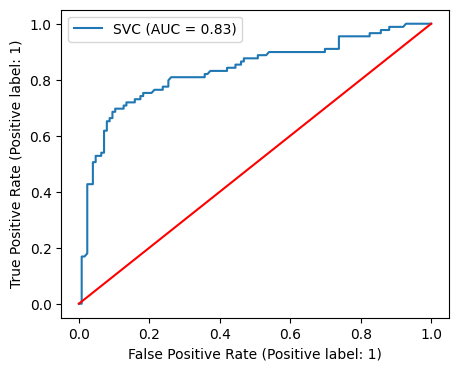

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(svm_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8324415908685571
0.8324415908685571


## SVM - HELOC 데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/HELOC_Data.xlsx', engine = 'openpyxl')
df.head()
# 연령, 성별, 소득, HELOC 상품 제안 응답 여부(1: 응답함, 0: 응답안함)

,Age,Sex,Income,HELOC
0,30,Female,101000,0
1,25,Male,86000,0
2,20,Male,50000,0
3,26,Male,58000,0
4,18,Female,93000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     500 non-null    int64 
 1   Sex     500 non-null    object
 2   Income  500 non-null    int64 
 3   HELOC   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Sex'].unique()

array([' Female', ' Male'], dtype=object)

In [ ]:
df['Sex'].replace(' ', '')

0       Female
1         Male
2         Male
3         Male
4       Female
        ...   
495       Male
496       Male
497     Female
498     Female
499       Male
Name: Sex, Length: 500, dtype: object

In [ ]:
df['Sex']= df['Sex'].str.replace(' ', '')

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['HELOC'].unique()

array([0, 1])

In [ ]:
df['HELOC'].value_counts()

HELOC
0    370
1    130
Name: count, dtype: int64

In [ ]:
df['HELOC'].value_counts(normalize = True)

HELOC
0    0.74
1    0.26
Name: proportion, dtype: float64

#### 데이터 분할

In [ ]:
df.columns

Index(['Age', 'Sex', 'Income', 'HELOC'], dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.iloc[:,0:-1]
y = df['HELOC']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (500, 3)
y 데이터:  (500,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (350, 3)
test 데이터:  (150, 3)


In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Sex
print(X_train['Sex'])
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
print(X_train['Sex'])
print(X_test['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])
print(X_test['Sex'])

5        Male
116    Female
45     Female
16       Male
462    Female
        ...  
106    Female
270    Female
348    Female
435      Male
102    Female
Name: Sex, Length: 350, dtype: object
5      1
116    0
45     0
16     1
462    0
      ..
106    0
270    0
348    0
435    1
102    0
Name: Sex, Length: 350, dtype: int64
361    Female
73       Male
374    Female
155    Female
104      Male
        ...  
266    Female
23     Female
222    Female
261    Female
426      Male
Name: Sex, Length: 150, dtype: object
361    0
73     1
374    0
155    0
104    1
      ..
266    0
23     0
222    0
261    0
426    1
Name: Sex, Length: 150, dtype: int64


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', probability=True)
svm_model.fit(X_train_scale, y_train)

SVC(probability=True)

In [ ]:
# 정확도
print(svm_model.score(X_train_scale, y_train))
print(svm_model.score(X_test_scale, y_test))

0.8285714285714286
0.8


### 성능평가

In [ ]:
y_train_pred = svm_model.predict(X_train_scale)
y_test_pred = svm_model.predict(X_test_scale)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]
[0 0 0 0 1]


In [ ]:
y_train_proba = svm_model.predict_proba(X_train_scale)
y_test_proba = svm_model.predict_proba(X_test_scale)
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.6091 0.3909]
 [0.8886 0.1114]
 [0.8893 0.1107]
 [0.9462 0.0538]
 [0.8827 0.1173]]
[[0.8869 0.1131]
 [0.9143 0.0857]
 [0.8892 0.1108]
 [0.8836 0.1164]
 [0.2154 0.7846]]


In [ ]:
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.8285714285714286
0.8


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[234  28]
 [ 32  56]]
[[90 18]
 [12 30]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       262
           1       0.67      0.64      0.65        88

    accuracy                           0.83       350
   macro avg       0.77      0.76      0.77       350
weighted avg       0.83      0.83      0.83       350

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       108
           1       0.62      0.71      0.67        42

    accuracy                           0.80       150
   macro avg       0.75      0.77      0.76       150
weighted avg       0.81      0.80      0.80       150



In [ ]:
# ROC - 1 기준
y_test_proba1 = svm_model.predict_proba(X_test_scale)[:,1]

In [ ]:
# FPR, TPR, Cutoff
from sklearn.metrics import roc_curve
fpr, tpr, cut = roc_curve(y_test, y_test_proba1)

In [ ]:
cut_index = np.arange(1, cut.shape[0])
print(np.round(cut[cut_index], 2)) # 임계값

# 임계값에 따른 fpr, tpr
print('fpr:',np.round(fpr[cut_index], 2))
print('tpr:',np.round(tpr[cut_index], 2))

[0.86 0.86 0.8  0.79 0.76 0.75 0.74 0.74 0.74 0.73 0.73 0.72 0.7  0.67
 0.66 0.65 0.64 0.63 0.62 0.62 0.59 0.53 0.52 0.45 0.42 0.36 0.32 0.32
 0.31 0.3  0.3  0.23 0.16 0.14 0.14 0.12 0.12 0.12 0.12 0.12 0.12 0.11
 0.11 0.1  0.09 0.08 0.08 0.04]
fpr: [0.   0.01 0.01 0.03 0.03 0.05 0.05 0.06 0.06 0.06 0.06 0.07 0.07 0.09
 0.09 0.1  0.1  0.11 0.11 0.12 0.12 0.14 0.14 0.17 0.17 0.19 0.19 0.19
 0.19 0.2  0.2  0.23 0.23 0.26 0.26 0.36 0.36 0.47 0.47 0.51 0.51 0.89
 0.89 0.94 0.94 0.96 0.96 1.  ]
tpr: [0.02 0.02 0.12 0.12 0.31 0.31 0.36 0.36 0.38 0.38 0.43 0.43 0.45 0.45
 0.5  0.5  0.52 0.52 0.55 0.55 0.62 0.62 0.67 0.67 0.71 0.71 0.74 0.74
 0.76 0.76 0.79 0.79 0.81 0.81 0.83 0.83 0.86 0.86 0.9  0.9  0.93 0.93
 0.95 0.95 0.98 0.98 1.   1.  ]


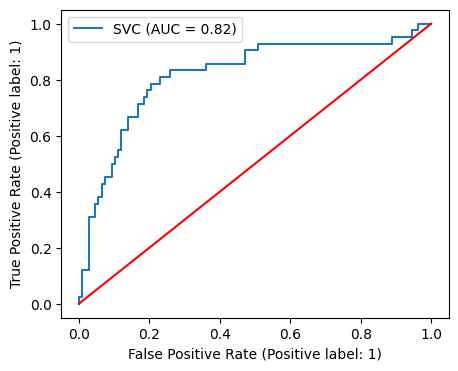

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(svm_model, X_test_scale, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='red')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, auc
print(roc_auc_score(y_test, y_test_proba1))
print(auc(fpr, tpr))

0.8174603174603174
0.8174603174603174


## DT

### 지니

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/HELOC_Data.xlsx', engine = 'openpyxl')
df.head()
# 연령, 성별, 소득, HELOC 상품 제안 응답 여부(1: 응답함, 0: 응답안함)

,Age,Sex,Income,HELOC
0,30,Female,101000,0
1,25,Male,86000,0
2,20,Male,50000,0
3,26,Male,58000,0
4,18,Female,93000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     500 non-null    int64 
 1   Sex     500 non-null    object
 2   Income  500 non-null    int64 
 3   HELOC   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Sex'].unique()

array([' Female', ' Male'], dtype=object)

In [ ]:
df['Sex']= df['Sex'].str.replace(' ', '')

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['HELOC'].unique()

array([0, 1])

In [ ]:
df['HELOC'].value_counts()

HELOC
0    370
1    130
Name: count, dtype: int64

In [ ]:
df['HELOC'].value_counts(normalize = True)

HELOC
0    0.74
1    0.26
Name: proportion, dtype: float64

In [ ]:
df.columns

#### 데이터 분할

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.iloc[:,0:-1]
y = df['HELOC']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (500, 3)
y 데이터:  (500,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (350, 3)
test 데이터:  (150, 3)


In [ ]:
# 더미변수
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Sex
print(X_train['Sex'])
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
print(X_train['Sex'])
print(X_test['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])
print(X_test['Sex'])

5        Male
116    Female
45     Female
16       Male
462    Female
        ...  
106    Female
270    Female
348    Female
435      Male
102    Female
Name: Sex, Length: 350, dtype: object
5      1
116    0
45     0
16     1
462    0
      ..
106    0
270    0
348    0
435    1
102    0
Name: Sex, Length: 350, dtype: int64
361    Female
73       Male
374    Female
155    Female
104      Male
        ...  
266    Female
23     Female
222    Female
261    Female
426      Male
Name: Sex, Length: 150, dtype: object
361    0
73     1
374    0
155    0
104    1
      ..
266    0
23     0
222    0
261    0
426    1
Name: Sex, Length: 150, dtype: int64


#### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

#### 전체나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
full_tree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
full_tree.fit(X_train_scale, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 정확도
print(full_tree.score(X_train_scale, y_train))
print(full_tree.score(X_test_scale, y_test))
# 과대적합

0.9971428571428571
0.7533333333333333


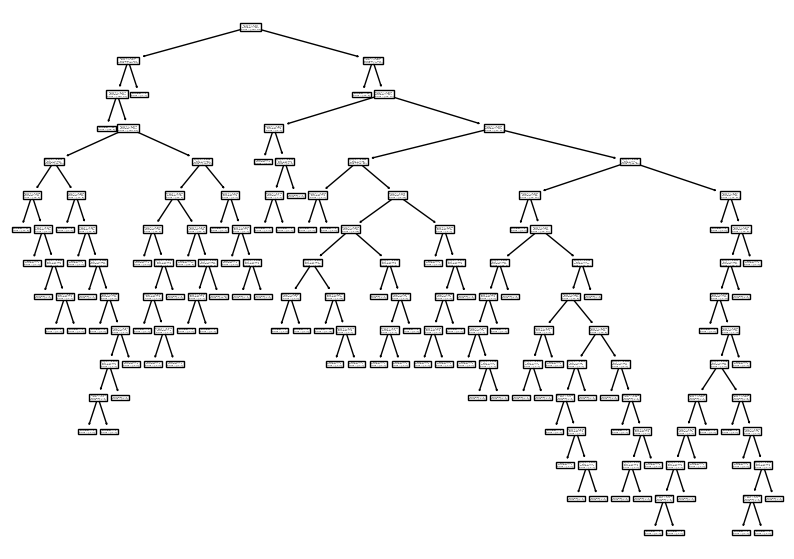

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(full_tree)
plt.show()

#### 나무깊이 - 표준화데이터

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state=42)
dt.fit(X_train_scale, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# 정확도
print(dt.score(X_train_scale, y_train))
print(dt.score(X_test_scale, y_test))
# 과소적합

0.8
0.76


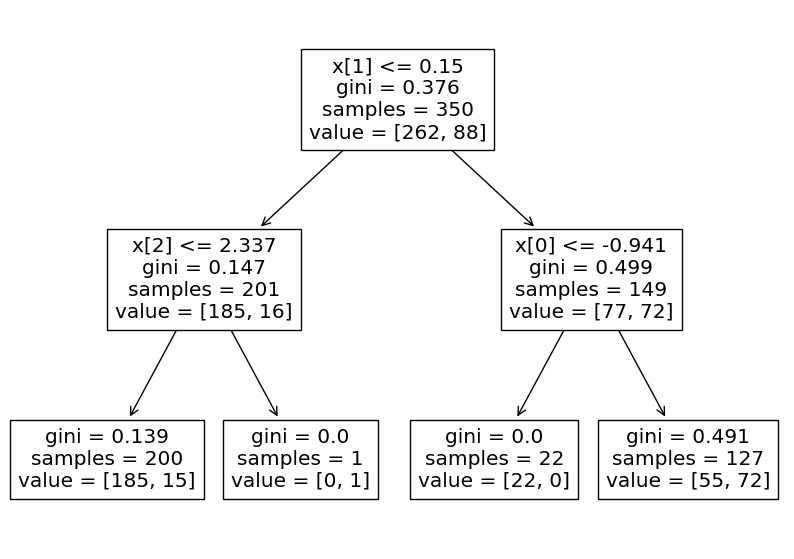

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()
# 해석이 어려움

#### 나무깊이 - 원데이터

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# 정확도
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
# 과소적합

0.8
0.76


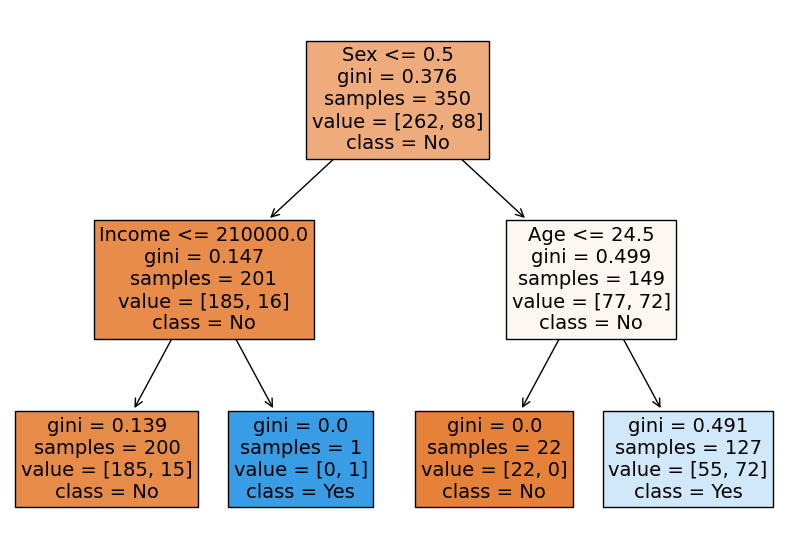

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt,
          feature_names = X.columns,
          filled = True,
          class_names = ["No", "Yes"],
          fontsize = 14)
plt.show()

#### 지니 불순도

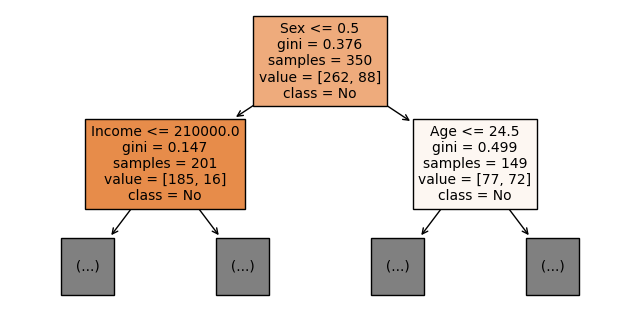

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (8,4))
plot_tree(dt,
          feature_names = X.columns,
          filled = True,
          class_names = ["No", "Yes"],
          fontsize = 10,
          max_depth = 1)
plt.show()

In [ ]:
# 위 결정나무 그림을 보고 지니 불순도 & 정보 이득 = 불순도 차이 를 직접 계산하라.

In [ ]:
# 지니 불순도 = 1 - (음성 클래스 비율 제곱 + 양성 클래스 비율 제곱)

In [ ]:
par = 1 - ((262/350)**2 + (88/350)**2)
print(par)

0.37642448979591836


In [ ]:
left = 1 - ((185/201)**2 + (16/201)**2)
print(left)

0.14653102645974103


In [ ]:
right = 1 - ((77/149)**2 + (72/149)**2)
print(right)

0.4994369622989955


In [ ]:
# 정보 이득 = 불순도 차이
# 부모의 불순도
# - (왼쪽 노드의 샘플 수/부모의 샘플수)*왼쪽 노드의 불순도
# - (오른쪽 노드의 샘플 수/부모의 샘플수)*오른쪽 노드의 불순도

In [ ]:
par - (201/350) * left - (149/350) * right

0.07965636493603759